
  # Построение модели для задачи классификации, которая выберет подходящий тариф для оператора мобильной связи 
**Заказчик** - компания «Мегалайн» — федеральный оператор сотовой связи.

**Цель** -  построение для оператора мобильной связи системы рекомендации, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

**Входные данные от Заказчика**: 
- В нашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы «Смарт» или «Ультра». Данные находятся в файле: 
  - `datasets/users_behavior.csv`


### Описание  данных

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


### ***План исследования:***

**1.** *Изучение файлов с данными.*

**2.** *Подготовка данных для исследования*

    - Разделим исходные данные на обучающую, валидационную и тестовую выборки.

**3.** *Исследовательский анализ моделей*

    - Исследуем качество разных моделей, меняя гиперпараметры.

**4.** *Проверка качество модели на тестовой выборке*

**5.** *Проверка модели на вменяемость.*

**6.** *Общий вывод*

### Изучение файлов с данными.

Начнем изучение наших данных с импортирования необходимых для выполнения исследования библиотек и распаковки файла.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
# распакуем файл
df = pd.read_csv(
    'datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод:**

Загрузили необходимые библиотеки. Данные без пропусков и наличии ошибок и готовы к исследованию.

### Подготовка данных для исследования

Разделим исходные данные на обучающую, валидационную и тестовую выборки, т.к. изначально спрятанной тестовой выборки нет. Исходные данные разобьем в соотношении 3:1:1 (60%, 20%, 20%). Для этого применим 2 раза метод train_test_split. В первой итерации отделим обучающую выборку от валидационной и тестовой, во второй разделим валидационную и тестовую.

In [4]:
# Разбиваем датасет на 3 выборки:обучающую, валидационную, тестовую
df_train, df_valid_test = train_test_split(
    df, train_size=0.6, random_state=2022)
# разделили валидационную и тестовую пополам
df_valid, df_test = train_test_split(
    df_valid_test, test_size=0.5, random_state=2022)

Выведем размеры получившихся выборок по строкам и столбцам соответственно.

In [5]:
# применим метод shape()
print('Обучающая выборка', df_train.shape)
print('Валидационная выборка', df_valid.shape)
print('Тестовая выборка', df_test.shape)

Обучающая выборка (1928, 5)
Валидационная выборка (643, 5)
Тестовая выборка (643, 5)


В нашем датасете 3214 строк. Проверим разбивку

In [6]:
print('{:0.2%} доля обучающей выборки'.format(df_train.shape[0] / 3214.))
print('{:0.2%} доля валидационной выборки'.format(df_valid.shape[0] / 3214.))
print('{:0.2%} доля тестовой выборки'.format(df_test.shape[0] / 3214.))

59.99% доля обучающей выборки
20.01% доля валидационной выборки
20.01% доля тестовой выборки


**Вывод:**

Разделение проведено корректно. Все данные готовы к дальнейшему исследованию.

### Исследовательский анализ моделей

Исследуем 3 модели машинного обучения для задачи классификации (решающее дерево, случайный лес и логистическая регрессия) и выберем лучшее для дальнейшей проверки на тестовой выборке. Перед переходом к примененю модели выделим обычные признаки и целевой признак обучающей и валидационной выборок.

Объявим переменные:

'train_features', 'valid_features'  — запишем в них признаки для обучающей и валидационной выборки;

'train_target', 'valid_target'  — целевой признак для обучающей и валидационной выборки.




In [7]:
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']
valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

#### Модель DecisionTree



In [8]:
best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 10):
    # обучение модели с заданной глубиной дерева
    model = DecisionTreeClassifier(
        random_state=2022, max_depth=depth, criterion='entropy')
    model.fit(train_features, train_target)
    # получаем предсказания модели
    predictions = model.predict(valid_features)
    # посчитаем качество модели
    result_DF = accuracy_score(valid_target, predictions)
    if result_DF > best_result:
        best_model = model
        best_result = result_DF
        best_depth = depth

print('Наилучшее качество модели {:.2f} при глубине дерева {}'.format(
    best_result, best_depth))

Наилучшее качество модели 0.79 при глубине дерева 9


Посмотрим, как визуально выглядит наше решающее дерево

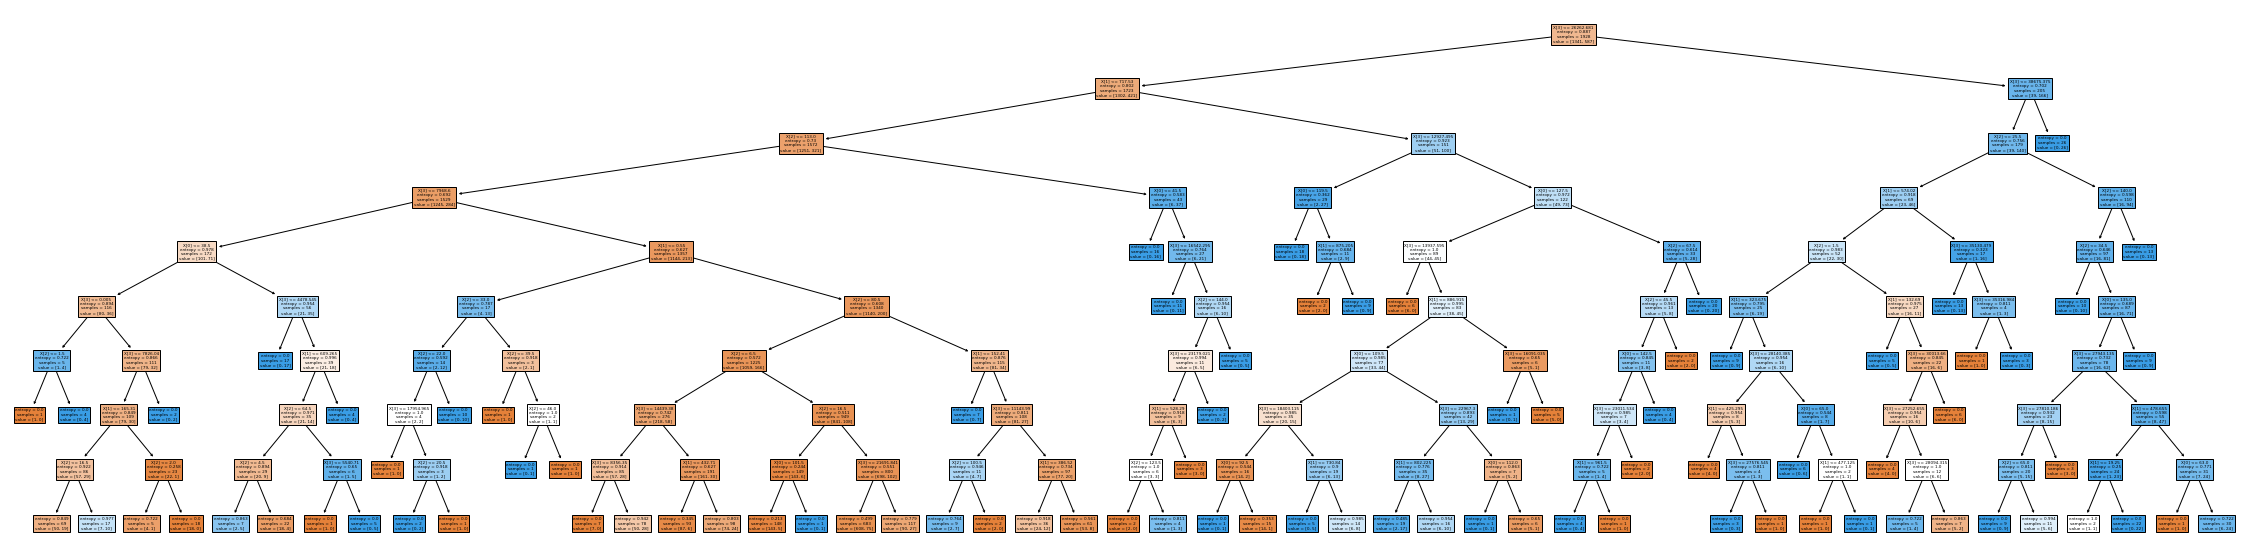

In [9]:
plt.figure(figsize=(40, 10))
plot_tree(best_model, filled=True)
plt.show()

#### Модель RandomForest

In [10]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_split = 0
for est in range(10, 51, 10):
    for depth in range(1, 9):
        for spl in (2, 5):
            model = RandomForestClassifier(random_state=2022,
                                           n_estimators=est,
                                           max_depth=depth, min_samples_split=spl)  # инициализируем модель
            # обучим модель на тренировочной выборке
            model.fit(train_features, train_target)
            # посчитаем качество модели на валидационной выборке
            result_RF = model.score(valid_features, valid_target)
            if result_RF > best_result:
                best_model = model
                best_result = result_RF
                best_est = est
                best_depth = depth
                best_split = spl

print('Наилучшее качество модели {:.2f} при количестве деревьев {} с максимальной глубиной {} и минимальным количество примеров для разделения {}'.format(
    best_result, best_est, best_depth, best_split))

Наилучшее качество модели 0.80 при количестве деревьев 50 с максимальной глубиной 8 и минимальным количество примеров для разделения 2


#### Модель LogisticRegression

In [11]:
# инициализируем модель логистической регрессии с параметром random_state=12345
model = LogisticRegression(random_state=2022)
# обучим модель на тренировочной выборке
model.fit(train_features, train_target)
# получим метрику качества модели на валидационной выборке
result_LR = model.score(valid_features, valid_target)

print('Наилучшее качество модели {:.2f}'.format(result_LR))

Наилучшее качество модели 0.70


**Вывод:**
При исследовании при заданном пороге точности 0.75 лучшими моделями показали себя Модель RandomForest(0.80) и Модель DecisionTree(0.79). Выберем обе модели для дальнейшей проверки на тестовой выборке, чтобы определиться с выбором.

### Проверка качество модели на тестовой выборке

Проведем проверку выбранной нами модели RandomForest на тестовой выборке.

Для этого сначала создадим обычные признаки  и целевой признак для тестовой выборки.

Объявим переменные:

'test_features' — запишем в неё обычные признаки;

'test_target' — целевой признак для тестовой выборки.

In [12]:
# создаем признаки для тестовой выборки
test_features = df_test.drop(['is_ultra'], axis=1)
# создаем целевой признак для тестовой выборки
test_target = df_test['is_ultra']

In [13]:
model_forest = RandomForestClassifier(
    random_state=2022, n_estimators=50, max_depth=8, min_samples_split=2)  # инициализируем модель
# обучим модель на тренировочной выборке
model_forest.fit(train_features, train_target)
# посчитаем качество модели на тестовой выборке
forest_test_result = model_forest.score(test_features, test_target)
print("Accuracy модели случайного леса на тестовой выборке:", forest_test_result)

Accuracy модели случайного леса на тестовой выборке: 0.8273716951788491


Проведем проверку выбранной нами модели DecisionTree на тестовой выборке.

In [14]:
model_tree = DecisionTreeClassifier(
    random_state=2022, max_depth=9, criterion='entropy')  # инициализируем модель
# обучим модель на тренировочной выборке
model_tree.fit(train_features, train_target)
# посчитаем качество модели на тестовой выборке
tree_test_result = model_tree.score(test_features, test_target)
print("Accuracy модели случайного леса на тестовой выборке:", tree_test_result)

Accuracy модели случайного леса на тестовой выборке: 0.80248833592535


**Вывод:**

Проверив обе модели на тестовой выборке, получаем наилучшую модель RandomForest, это видно по точности предсказания на валидационной и на тестовой выборке.

### Проверка модели на вменяемость.

Для начала создадим констатную модель

In [15]:
target_predict_constant = pd.Series([0]*len(valid_target))
target_predict_constant.shape

(643,)

Выведем точность константной модели

In [16]:
accuracy_score_constant = accuracy_score(valid_target, target_predict_constant)
accuracy_score_constant

0.6889580093312597

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(train_features, train_target)
dummy_clf.score(test_features, test_target)

0.6920684292379471

Константная модель ошибается в ~30%, а наша выбранная модель в 20%.

**Вывод:** Модель RandomForest адекватна, так как ее качество  лучше качества baseline модели.

### Общий вывод

В ходе проверки трех различных алгоритмов машинного обучения для поставленной задачи классификации наилучшей оказалась модель RandomForest со следующими параметрами: количество деревьев 50, глубина 8, минимальное количество примеров для разделения 2.

Данная модель позволила получить значительную долю верных ответов как на валидационной (0,80), так и на тестовой (0,83) выборках. Оценка адекватности примененной модели показала, что  ее качество лучше качества baseline модели.